
# 📊 02 — Analysis & Visualizations

Notebook ini membaca `data/clean/vacancies_scored.parquet` dan menghasilkan tabel/grafik berikut:

- **Profesi terpadat** (peminat terbanyak per *posisi*)
- **Daerah dengan perusahaan terbanyak** (provinsi)
- **Lowongan dengan peminat tertinggi** (per posisi)
- **Lowongan peluang besar** (rasio pelamar/kuota terendah)
- **Skill yang paling dicari** (frekuensi skill)
- **Ringkasan & ekspor** (CSV/PNG ke `output/`)

> Catatan:
> - Grafik menggunakan **matplotlib** (tanpa seaborn, satu chart per plot).
> - Jalankan notebook dari folder `notebooks/`. Path relatif sudah dipersiapkan agar tetap bekerja.


In [6]:

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# --- Resolve project root robustly ---
HERE = Path.cwd()
# Asumsikan notebook disimpan di magang-intel/notebooks/
CANDIDATES = [HERE, HERE.parent, HERE.parent.parent]
ROOT = None
for c in CANDIDATES:
    if (c / "data").exists() and (c / "output").exists():
        ROOT = c
        break
if ROOT is None:
    ROOT = HERE  # fallback

DATA_CLEAN = ROOT / "data" / "clean"
OUT_TABLES = ROOT / "output" / "tables"
OUT_FIGS = ROOT / "output" / "figures"

OUT_TABLES.mkdir(parents=True, exist_ok=True)
OUT_FIGS.mkdir(parents=True, exist_ok=True)

display(Markdown(f"**Project root:** `{ROOT}`"))
print("Tables  :", OUT_TABLES)
print("Figures :", OUT_FIGS)

# --- Load dataset ---
scored_path = DATA_CLEAN / "vacancies_scored.parquet"
if not scored_path.exists():
    raise FileNotFoundError(f"File tidak ditemukan: {scored_path}. Jalankan 01_build_dataset.ipynb terlebih dahulu.")
df = pd.read_parquet(scored_path)

# Sanity preview
display(df.head(3))
print("Baris:", len(df), "| Kolom:", len(df.columns))


**Project root:** `c:\Users\Azahr\OneDrive\Dokumen\kerja\Ngoding\magang-intel`

Tables  : c:\Users\Azahr\OneDrive\Dokumen\kerja\Ngoding\magang-intel\output\tables
Figures : c:\Users\Azahr\OneDrive\Dokumen\kerja\Ngoding\magang-intel\output\figures


,id_posisi,posisi,deskripsi_posisi,jumlah_kuota,jumlah_terdaftar,status_posisi,nama_perusahaan,nama_provinsi,nama_kabupaten,alamat_perusahaan,...,competition_ratio,days_to_deadline,skills_extracted,skills_score,is_data_related,freshness_score,quota_score,competition_score,priority_score,rank
0,a0481763-ead0-4c17-9f95-e1c91fbdae7c,Data Analytics & Visualization Support,Pemahaman data lifecycle (collect–process–anal...,8,41,Terverifikasi,Perusahaan Perseroan (Persero) PT. Asuransi Kr...,DKI JAKARTA,KOTA ADM. JAKARTA PUSAT,Graha Askrindo Jl. Angkasa Blok B-9 Kav. 8,...,5.125,NaN,"[insight, power bi, python, tableau]",1.000000,True,0.0,0.253096,0.146189,0.479857,1
1,a0525870-d198-4067-9546-c41a6cf40a43,Ners,Ners magang bertugas memberikan dukungan dalam...,100,19,Terverifikasi,Rumah Sakit Universitas Indonesia,JAWA BARAT,KOTA DEPOK,"JL PROF. DR BAHDER JOHAN, KAMPUS UI DEPOK",...,0.190,NaN,[validasi],0.259182,False,0.0,1.000000,0.837078,0.471088,2
2,a0480596-ab72-47d0-bbdb-53ef8303d58b,Data Analyst Internship,Job Purpose\n\nPosisi ini bertujuan untuk mend...,10,92,Terverifikasi,Federal International Finance,DKI JAKARTA,KOTA ADM. JAKARTA SELATAN,"Menara FIF Lantai 3-9, Jalan TB. Simatupang Ka...",...,9.200,NaN,"[analisis data, dashboard, excel, insight, kom...",0.925849,True,0.0,0.339503,0.079632,0.454166,3


Baris: 2000 | Kolom: 29


In [7]:

def save_barh(ax, fig_path: Path, title: str, xlabel: str):
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.invert_yaxis()  # supaya nilai top berada di atas
    plt.tight_layout()
    plt.savefig(fig_path, dpi=200)
    plt.show()
    print(f"[SAVED] {fig_path}")


## 1) Profesi terpadat (peminat terbanyak per posisi)

[SAVED] c:\Users\Azahr\OneDrive\Dokumen\kerja\Ngoding\magang-intel\output\tables\top_profesi_terpadat.csv


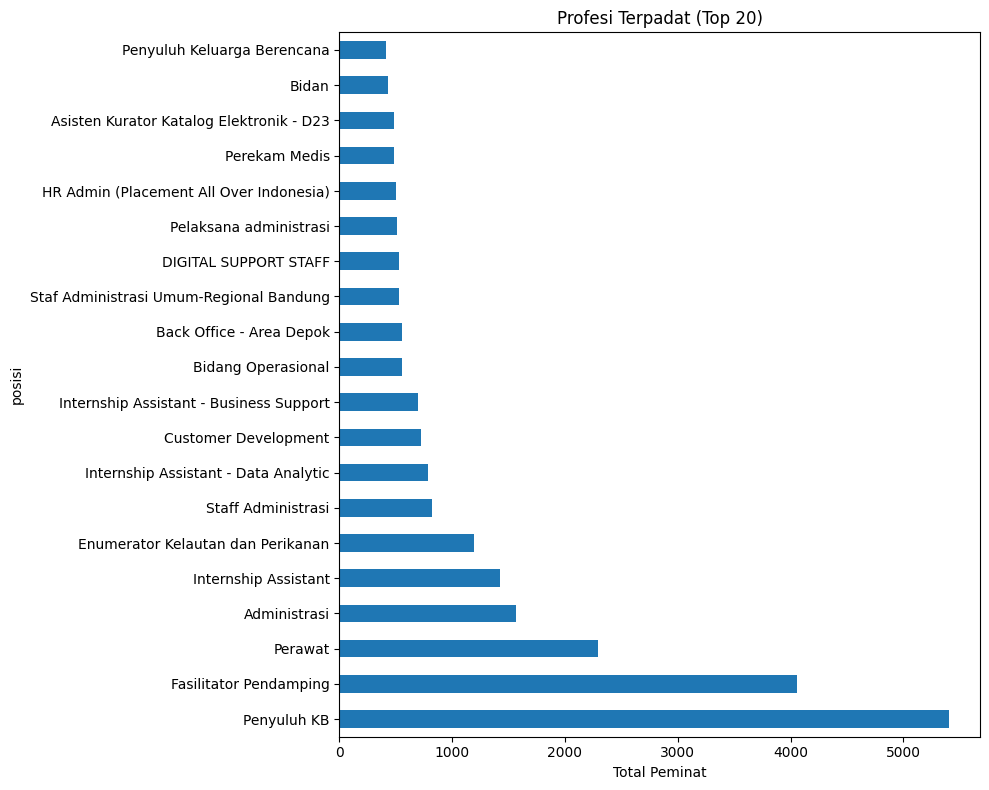

[SAVED] c:\Users\Azahr\OneDrive\Dokumen\kerja\Ngoding\magang-intel\output\figures\top_profesi_terpadat.png


In [8]:

top_n = 20
g = df.groupby("posisi", dropna=True)["jumlah_terdaftar"].sum().sort_values(ascending=False).head(top_n)
tbl_path = OUT_TABLES / "top_profesi_terpadat.csv"
g.to_csv(tbl_path, header=True, encoding="utf-8-sig")
print(f"[SAVED] {tbl_path}")

fig_path = OUT_FIGS / "top_profesi_terpadat.png"
plt.figure(figsize=(10, max(6, len(g) * 0.4)))
ax = g.sort_values(ascending=True).plot(kind="barh")
save_barh(ax, fig_path, "Profesi Terpadat (Top 20)", "Total Peminat")


## 2) Daerah (provinsi) dengan perusahaan terbanyak

[SAVED] c:\Users\Azahr\OneDrive\Dokumen\kerja\Ngoding\magang-intel\output\tables\top_provinsi_banyak_perusahaan.csv


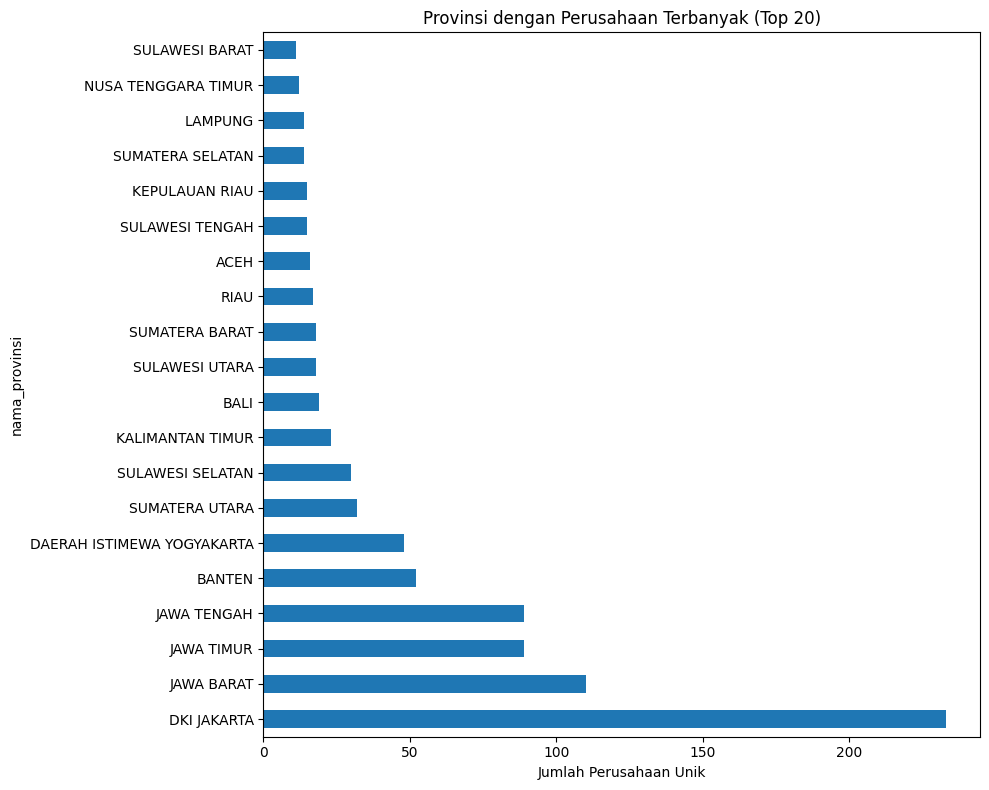

[SAVED] c:\Users\Azahr\OneDrive\Dokumen\kerja\Ngoding\magang-intel\output\figures\top_provinsi_banyak_perusahaan.png


In [9]:

# Hitung perusahaan unik per provinsi
tmp = df.groupby(["nama_provinsi"])["nama_perusahaan"].nunique().sort_values(ascending=False)
g = tmp.head(20)
tbl_path = OUT_TABLES / "top_provinsi_banyak_perusahaan.csv"
g.to_csv(tbl_path, header=True, encoding="utf-8-sig")
print(f"[SAVED] {tbl_path}")

fig_path = OUT_FIGS / "top_provinsi_banyak_perusahaan.png"
plt.figure(figsize=(10, max(6, len(g) * 0.4)))
ax = g.sort_values(ascending=True).plot(kind="barh")
save_barh(ax, fig_path, "Provinsi dengan Perusahaan Terbanyak (Top 20)", "Jumlah Perusahaan Unik")


## 3) Lowongan dengan peminat tertinggi

[SAVED] c:\Users\Azahr\OneDrive\Dokumen\kerja\Ngoding\magang-intel\output\tables\top_lowongan_peminat_tertinggi.csv


,posisi,nama_perusahaan,nama_provinsi,jumlah_kuota,jumlah_terdaftar,competition_ratio
76,Internship Assistant - Data Analytic,PT Bank Rakyat Indonesia (Persero) Tbk,DKI JAKARTA,86,785,9.1279
248,Penyuluh KB,BKKBN Jawa Tengah,JAWA TENGAH,103,719,6.9806
325,Customer Development,PT Nutrifood Indonesia (Head Office Jakarta),DKI JAKARTA,65,719,11.0615
228,Penyuluh KB,BKKBN Jawa Timur,JAWA TIMUR,118,695,5.8898
83,Internship Assistant - Business Support,PT Bank Rakyat Indonesia (Persero) Tbk,DKI JAKARTA,68,692,10.1765
1060,Bidang Operasional,Perkebunan Nusantara Iv,RIAU,15,559,37.2667
226,Penyuluh KB,BKKBN Jawa Barat,JAWA BARAT,96,554,5.7708
52,Back Office - Area Depok,Bank Syariah Indonesia,JAWA BARAT,50,554,11.0800
200,Staf Administrasi Umum-Regional Bandung,Bank Syariah Indonesia,JAWA BARAT,20,528,26.4000
330,Pelaksana administrasi,Bank Bsi Regional Office I Aceh,ACEH,16,514,32.1250


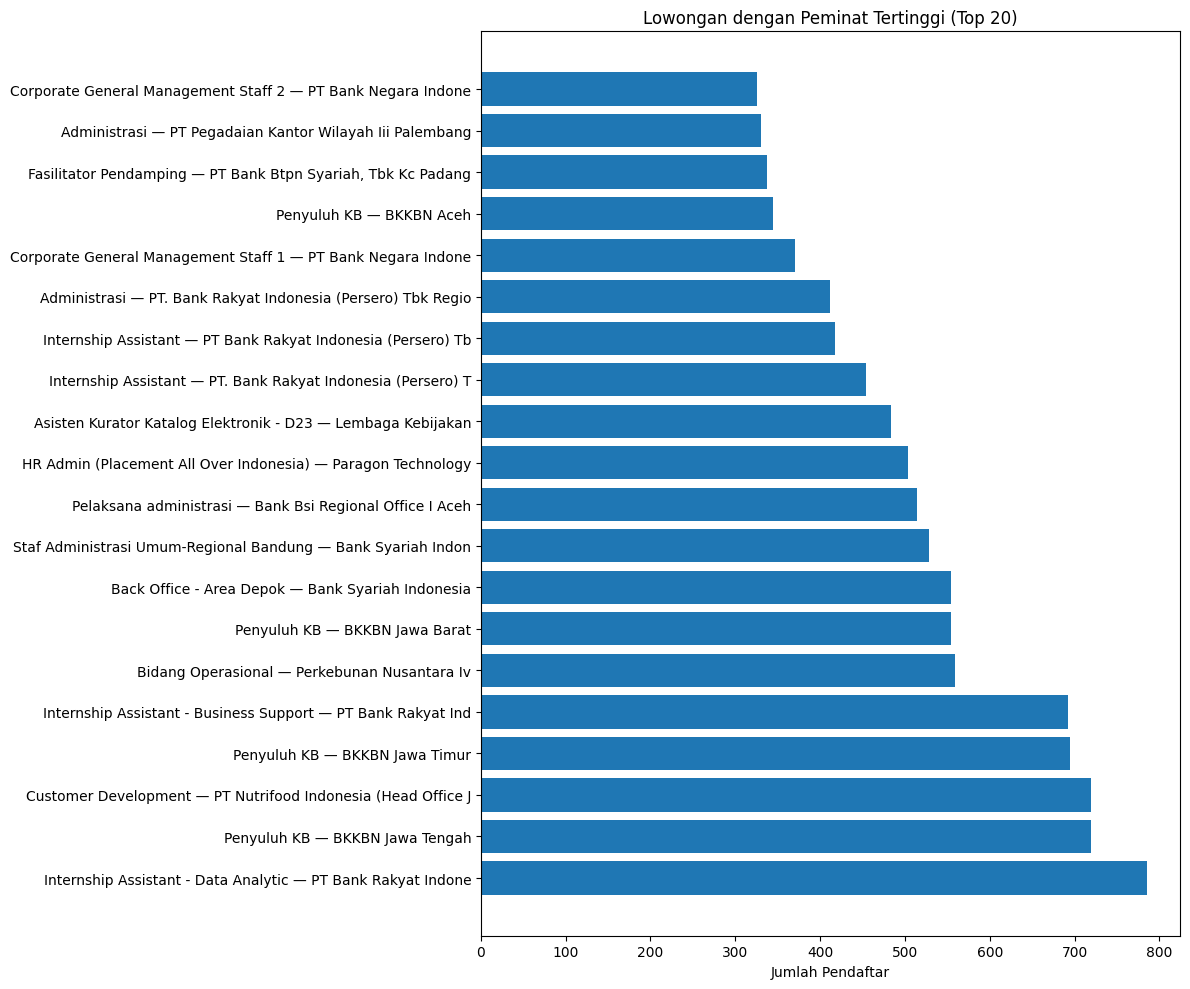

[SAVED] c:\Users\Azahr\OneDrive\Dokumen\kerja\Ngoding\magang-intel\output\figures\top_lowongan_peminat_tertinggi.png


In [10]:

cols = ["posisi", "nama_perusahaan", "nama_provinsi", "jumlah_kuota", "jumlah_terdaftar", "competition_ratio"]
top = df.sort_values("jumlah_terdaftar", ascending=False).head(20)[cols]
tbl_path = OUT_TABLES / "top_lowongan_peminat_tertinggi.csv"
top.to_csv(tbl_path, index=False, encoding="utf-8-sig")
print(f"[SAVED] {tbl_path}")
display(top)

# Plot (gabungkan posisi + perusahaan agar unik)
labels = (top["posisi"] + " — " + top["nama_perusahaan"]).str.slice(0, 60)  # potong agar rapi
vals = top["jumlah_terdaftar"].values

fig_path = OUT_FIGS / "top_lowongan_peminat_tertinggi.png"
plt.figure(figsize=(12, max(6, len(top) * 0.5)))
ax = plt.barh(range(len(vals)), vals)
plt.yticks(range(len(vals)), labels)
plt.title("Lowongan dengan Peminat Tertinggi (Top 20)")
plt.xlabel("Jumlah Pendaftar")
plt.tight_layout()
plt.savefig(fig_path, dpi=200)
plt.show()
print(f"[SAVED] {fig_path}")


## 4) Lowongan peluang besar (rasio pelamar/kuota terendah)

[SAVED] c:\Users\Azahr\OneDrive\Dokumen\kerja\Ngoding\magang-intel\output\tables\lowongan_peluang_besar.csv


,posisi,nama_perusahaan,nama_provinsi,jumlah_kuota,jumlah_terdaftar,competition_ratio,days_to_deadline
61,APOTEKER,Rumah Sakit Umum Daerah Dokter Mohamad Soewandhie,JAWA TIMUR,15,0,0.0,NaN
283,Housekeeping Internship,Pmj Sakti Gamat,BALI,5,0,0.0,NaN
282,Dokter Umum,Rumah Sakit Umum Pusat Makassar,SULAWESI SELATAN,5,0,0.0,NaN
281,Comercial Non Fresh,Matahari Putra Prima,BANTEN,5,0,0.0,NaN
280,General Maintenance,Rasuna Residence Development,DKI JAKARTA,5,0,0.0,NaN
279,Okupasi Terapi Terampil,Rumah Sakit Umum Pusat Dr. Wahidin Sudirohusod...,SULAWESI SELATAN,5,0,0.0,NaN
278,Instruktur Prodi SKU,Politeknik Pariwisata Palembang,SUMATERA SELATAN,5,0,0.0,NaN
277,Sales Korea/Mandarin,PT. Voffice,DKI JAKARTA,5,0,0.0,NaN
284,Dokter Umum,Rumah Sakit Al Huda Genteng,JAWA TIMUR,5,0,0.0,NaN
291,NUTRISIONIS DIETISIEN,Rumah Sakit Umum Dr. H. Koesnadi Kabupaten Bon...,JAWA TIMUR,5,0,0.0,NaN


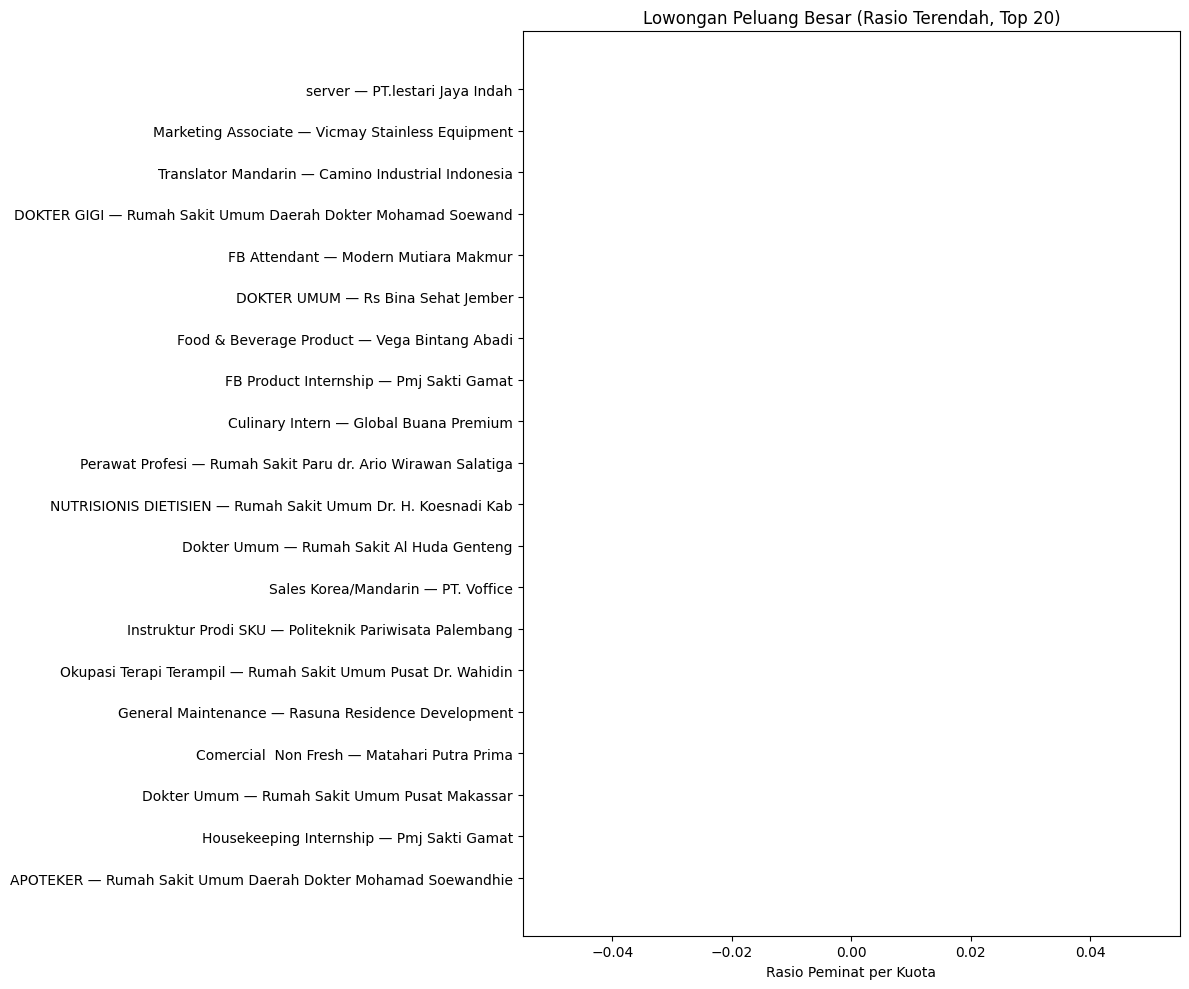

[SAVED] c:\Users\Azahr\OneDrive\Dokumen\kerja\Ngoding\magang-intel\output\figures\lowongan_peluang_besar.png


In [11]:

mask = df["competition_ratio"].notna() & (df["jumlah_kuota"] > 0)
cand = df.loc[mask].copy()
low = cand.sort_values("competition_ratio", ascending=True).head(20)
cols = ["posisi","nama_perusahaan","nama_provinsi","jumlah_kuota","jumlah_terdaftar","competition_ratio","days_to_deadline"]
tbl_path = OUT_TABLES / "lowongan_peluang_besar.csv"
low[cols].to_csv(tbl_path, index=False, encoding="utf-8-sig")
print(f"[SAVED] {tbl_path}")
display(low[cols])

labels = (low["posisi"] + " — " + low["nama_perusahaan"]).str.slice(0, 60)
vals = low["competition_ratio"].values

fig_path = OUT_FIGS / "lowongan_peluang_besar.png"
plt.figure(figsize=(12, max(6, len(low) * 0.5)))
ax = plt.barh(range(len(vals)), vals)
plt.yticks(range(len(vals)), labels)
plt.title("Lowongan Peluang Besar (Rasio Terendah, Top 20)")
plt.xlabel("Rasio Peminat per Kuota")
plt.tight_layout()
plt.savefig(fig_path, dpi=200)
plt.show()
print(f"[SAVED] {fig_path}")


## 5) Skill yang paling dicari

[SAVED] c:\Users\Azahr\OneDrive\Dokumen\kerja\Ngoding\magang-intel\output\tables\top_skills.csv


,count
skills_extracted,
komunikasi,295
presentasi,77
excel,67
validasi,49
analisis data,41
insight,23
mapping,23
statistik,16
reporting,13


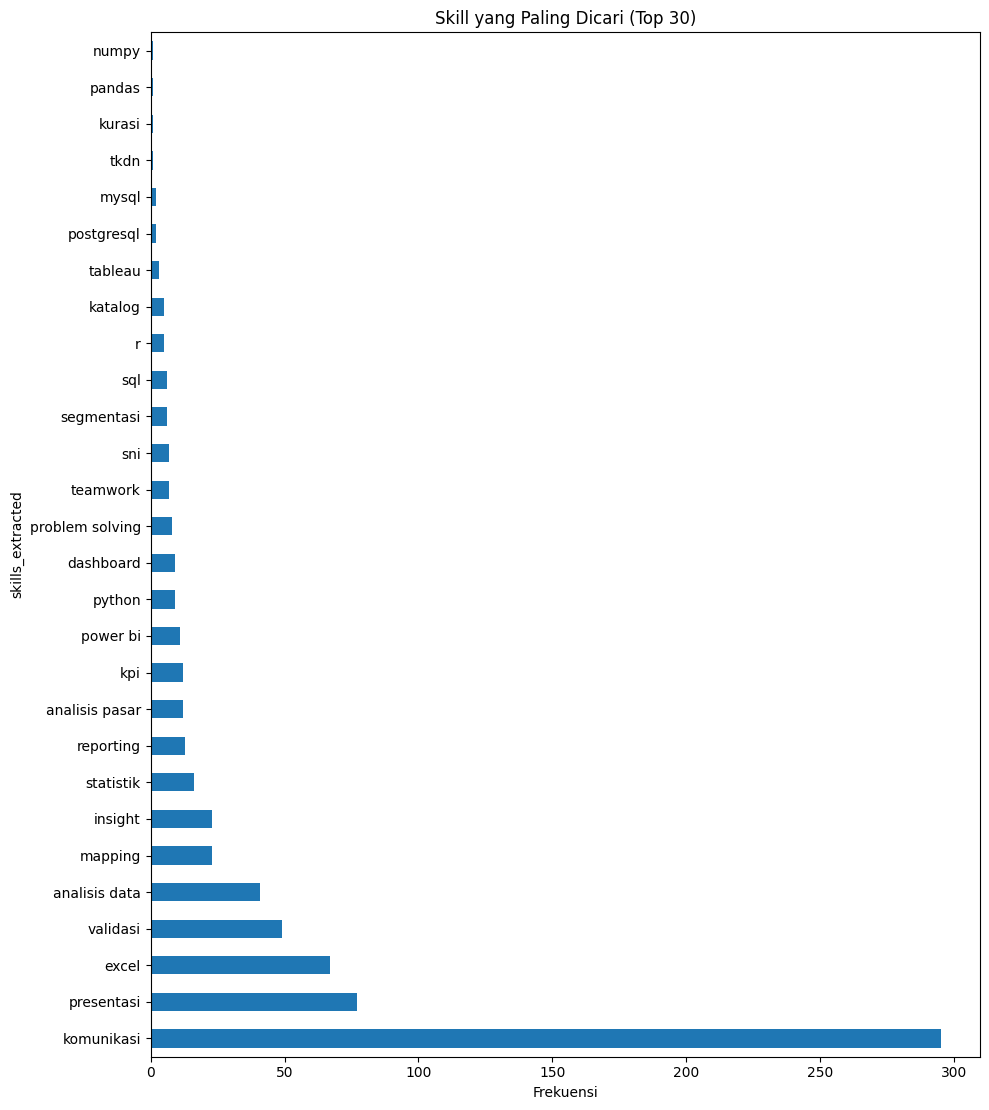

[SAVED] c:\Users\Azahr\OneDrive\Dokumen\kerja\Ngoding\magang-intel\output\figures\top_skills.png


In [12]:

# Explode skills_extracted (list ke baris)
s = (
    df.explode("skills_extracted")
      .dropna(subset=["skills_extracted"])
      ["skills_extracted"]
      .value_counts()
)

top_n = 30
g = s.head(top_n)
tbl_path = OUT_TABLES / "top_skills.csv"
g.to_csv(tbl_path, header=True, encoding="utf-8-sig")
print(f"[SAVED] {tbl_path}")
display(g.to_frame("count"))

fig_path = OUT_FIGS / "top_skills.png"
plt.figure(figsize=(10, max(6, len(g) * 0.4)))
ax = g.sort_values(ascending=True).plot(kind="barh")
save_barh(ax, fig_path, "Skill yang Paling Dicari (Top 30)", "Frekuensi")


## 6) Ringkasan KPI singkat

In [13]:

kpi = {}
kpi["total_lowongan"] = int(len(df))
kpi["total_perusahaan_unik"] = int(df["nama_perusahaan"].nunique())
kpi["provinsi_teratas"] = (
    df.groupby("nama_provinsi")["nama_perusahaan"].nunique().sort_values(ascending=False).head(3).to_dict()
)
kpi["persen_data_related"] = float((df.get("is_data_related", pd.Series([False]*len(df))).sum() / len(df))*100)

display(pd.DataFrame([kpi]))
pd.Series(kpi).to_json(OUT_TABLES / "kpi_summary.json", force_ascii=False, indent=2)
print(f"[SAVED] {OUT_TABLES / 'kpi_summary.json'}")


,total_lowongan,total_perusahaan_unik,provinsi_teratas,persen_data_related
0,2000,907,"{'DKI JAKARTA': 233, 'JAWA BARAT': 110, 'JAWA ...",6.15


[SAVED] c:\Users\Azahr\OneDrive\Dokumen\kerja\Ngoding\magang-intel\output\tables\kpi_summary.json



### ✅ Selesai
Semua **tabel** tersimpan di `output/tables/` dan **grafik** di `output/figures/`.

Lanjut ide visualisasi lain?
- Tren pendaftaran harian (butuh timestamp granular jika tersedia)
- Heatmap sebaran lowongan per provinsi vs kategori posisi
- Perbandingan skor prioritas antar provinsi/kementerian
